In [1]:
import imageio
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 5.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1.5

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
dd1 = dict()

dd1 = add_input_file(dd1, '01_Original_01/output/output.mat', '1 O')
dd1 = add_input_file(dd1, '01_Original_02/output/output.mat', '2 O')
dd1 = add_input_file(dd1, '01_Original_03/output/output.mat', '3 O')
dd1 = add_input_file(dd1, '01_Original_04/output/output.mat', '4 O')
dd1 = add_input_file(dd1, '01_Original_05/output/output.mat', '5 O')
dd1 = add_input_file(dd1, '01_Original_06/output/output.mat', '6 O')
dd1 = add_input_file(dd1, '01_Original_07/output/output.mat', '7 O')
dd1 = add_input_file(dd1, '01_Original_08/output/output.mat', '8 O')

dd1 = add_input_file(dd1, '02_LessMPI_01/output/output.mat', '1 N')
dd1 = add_input_file(dd1, '02_LessMPI_02/output/output.mat', '2 N')
dd1 = add_input_file(dd1, '02_LessMPI_03/output/output.mat', '3 N')
dd1 = add_input_file(dd1, '02_LessMPI_04/output/output.mat', '4 N')
dd1 = add_input_file(dd1, '02_LessMPI_05/output/output.mat', '5 N')
dd1 = add_input_file(dd1, '02_LessMPI_06/output/output.mat', '6 N')
dd1 = add_input_file(dd1, '02_LessMPI_07/output/output.mat', '7 N')
dd1 = add_input_file(dd1, '02_LessMPI_08/output/output.mat', '8 N')

save_folder = 'Plots'
sc = 'SbS'
Case = 'SC_Outputs'
legend_label = 'Nodes'
main_label = 'HPC-Batch_Tests'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 50
zoom_turns = 15
turns = [0 ,1, 5, 10, 50]
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  01_Original_01/output/output.mat 	 dictionary key:  1 O
	Added output data from  01_Original_02/output/output.mat 	 dictionary key:  2 O
	Added output data from  01_Original_03/output/output.mat 	 dictionary key:  3 O
	Added output data from  01_Original_04/output/output.mat 	 dictionary key:  4 O
	Added output data from  01_Original_05/output/output.mat 	 dictionary key:  5 O
	Added output data from  01_Original_06/output/output.mat 	 dictionary key:  6 O
	Added output data from  01_Original_07/output/output.mat 	 dictionary key:  7 O
	Added output data from  01_Original_08/output/output.mat 	 dictionary key:  8 O
	Added output data from  02_LessMPI_01/output/output.mat 	 dictionary key:  1 N
	Added output data from  02_LessMPI_02/output/output.mat 	 dictionary key:  2 N
	Added output data from  02_LessMPI_03/output/output.mat 	 dictionary key:  3 N
	Added output data from  02_LessMPI_04/output/output.mat 	 dictionary key:  4 N
	Added output data from  02_Less

In [5]:
dd1['1 O'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

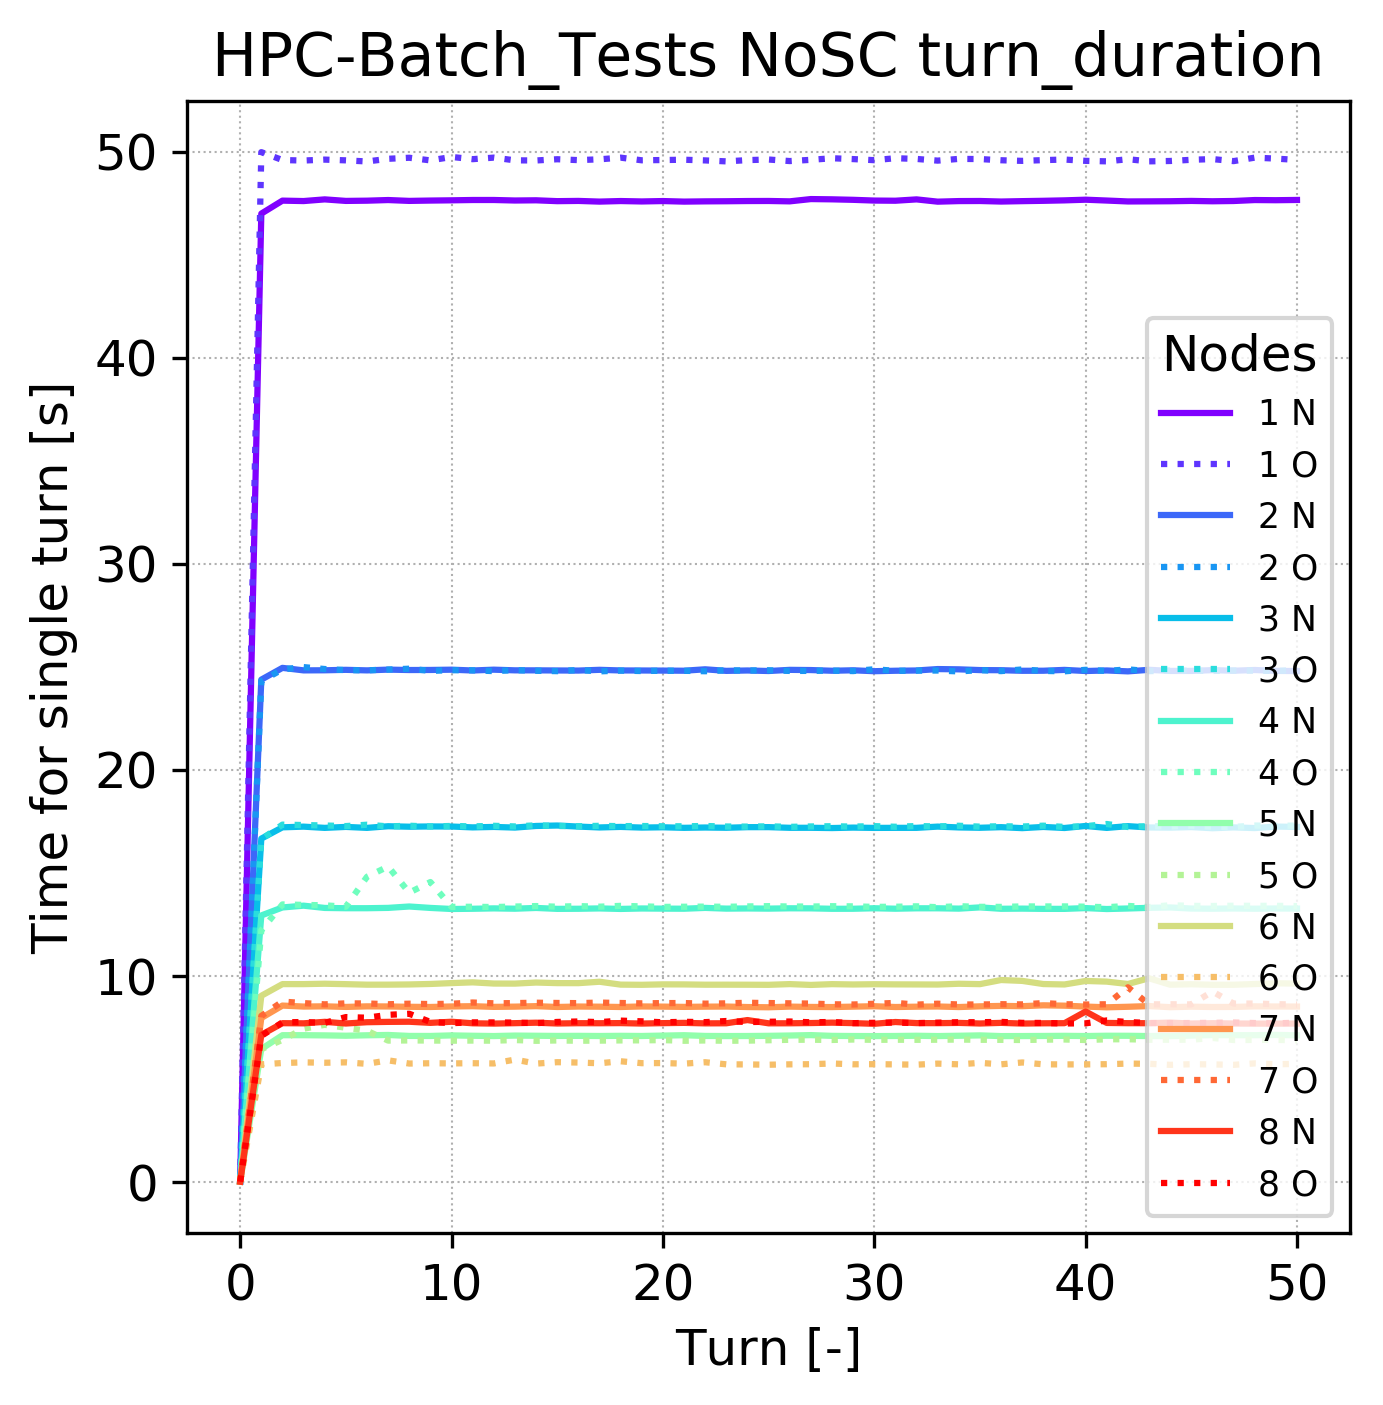

In [6]:
parameter = 'turn_duration'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time for single turn [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    if 'O' in key:
        ls = ':'
    else:
        ls = '-'
    ax1.plot(dd1[key]['turn'][0]+1, dd1[key][parameter][0], label=key, color=colors[c_it], ls=ls);
    #ax1.scatter(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it])
    c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid(ls=':', lw=0.5)

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

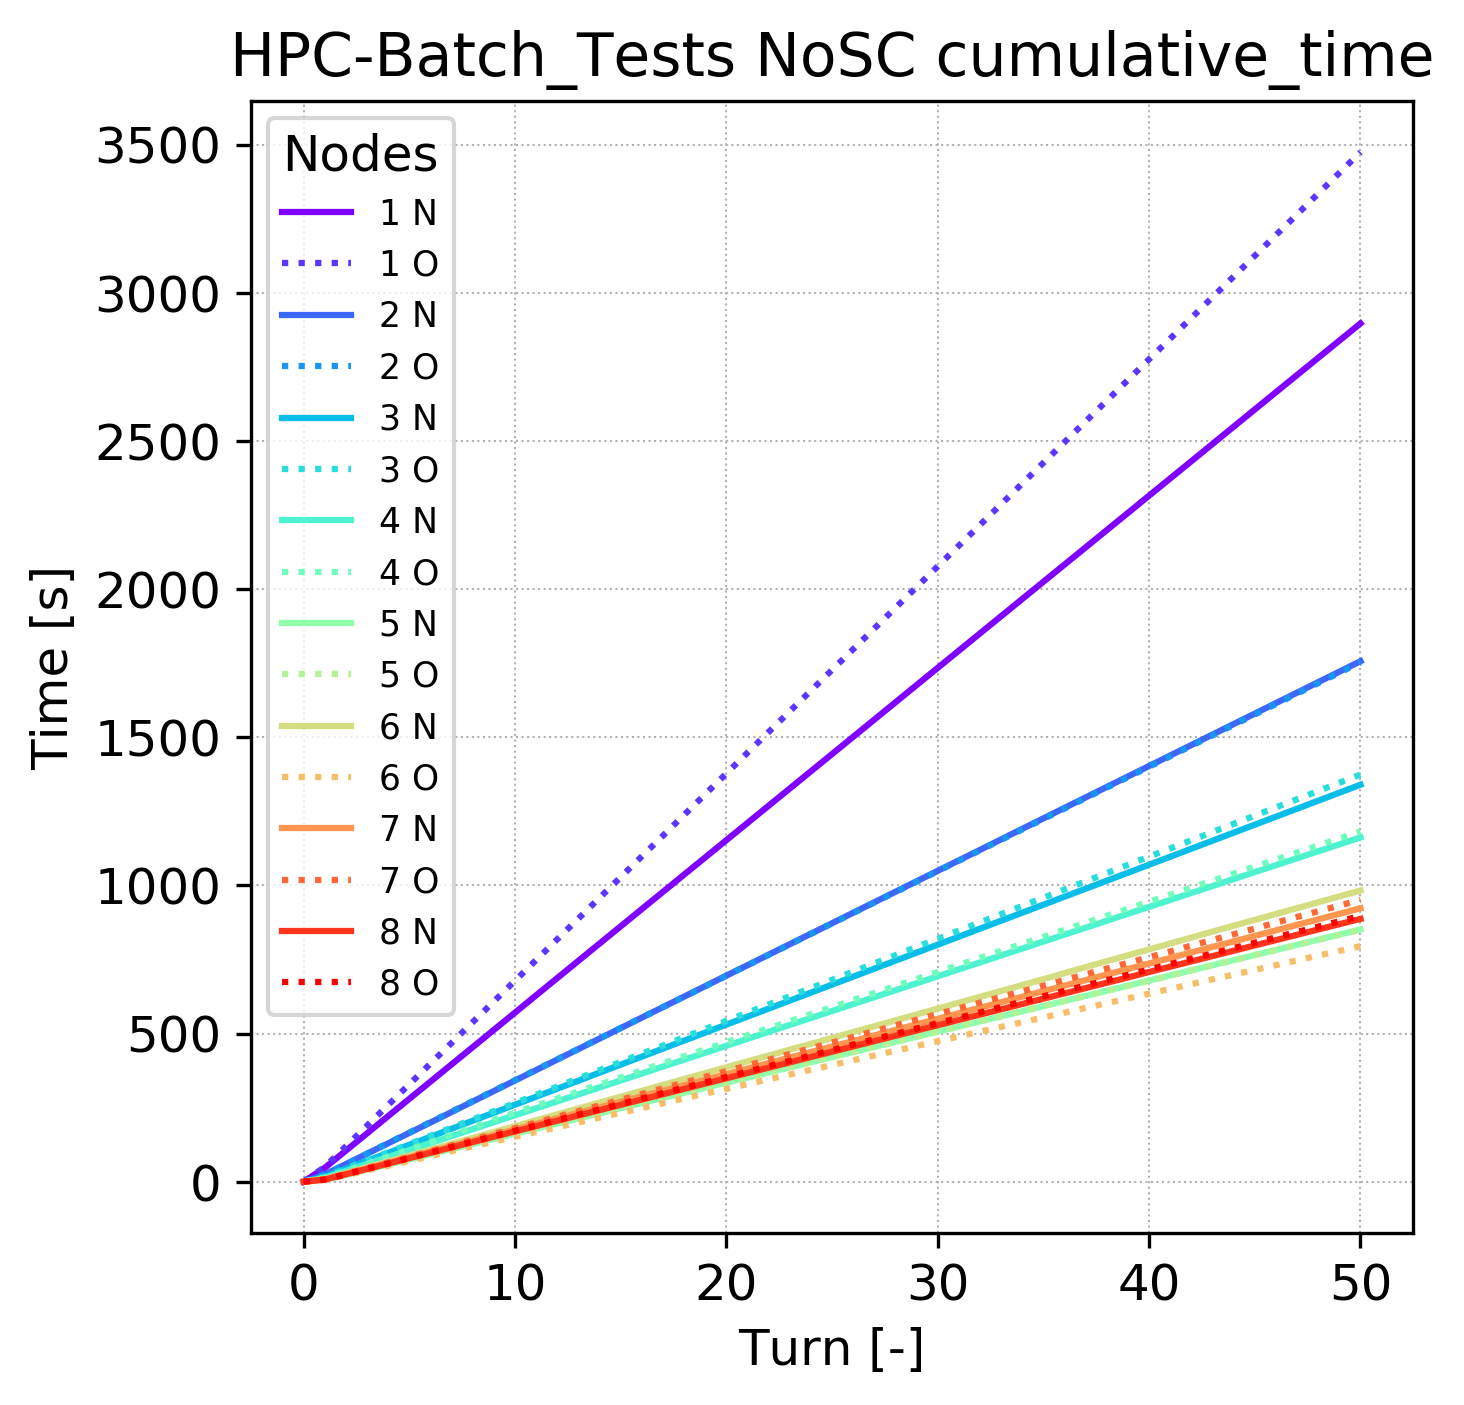

In [7]:
parameter = 'cumulative_time'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    if 'O' in key:
        ls = ':'
    else:
        ls = '-'
    ax1.plot(dd1[key]['turn'][0]+1, dd1[key][parameter][0], label=key, color=colors[c_it], ls=ls);
    #ax1.scatter(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it])
    c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=2, title=legend_label)
ax1.grid(ls=':', lw=0.5)

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

## Speedup factor

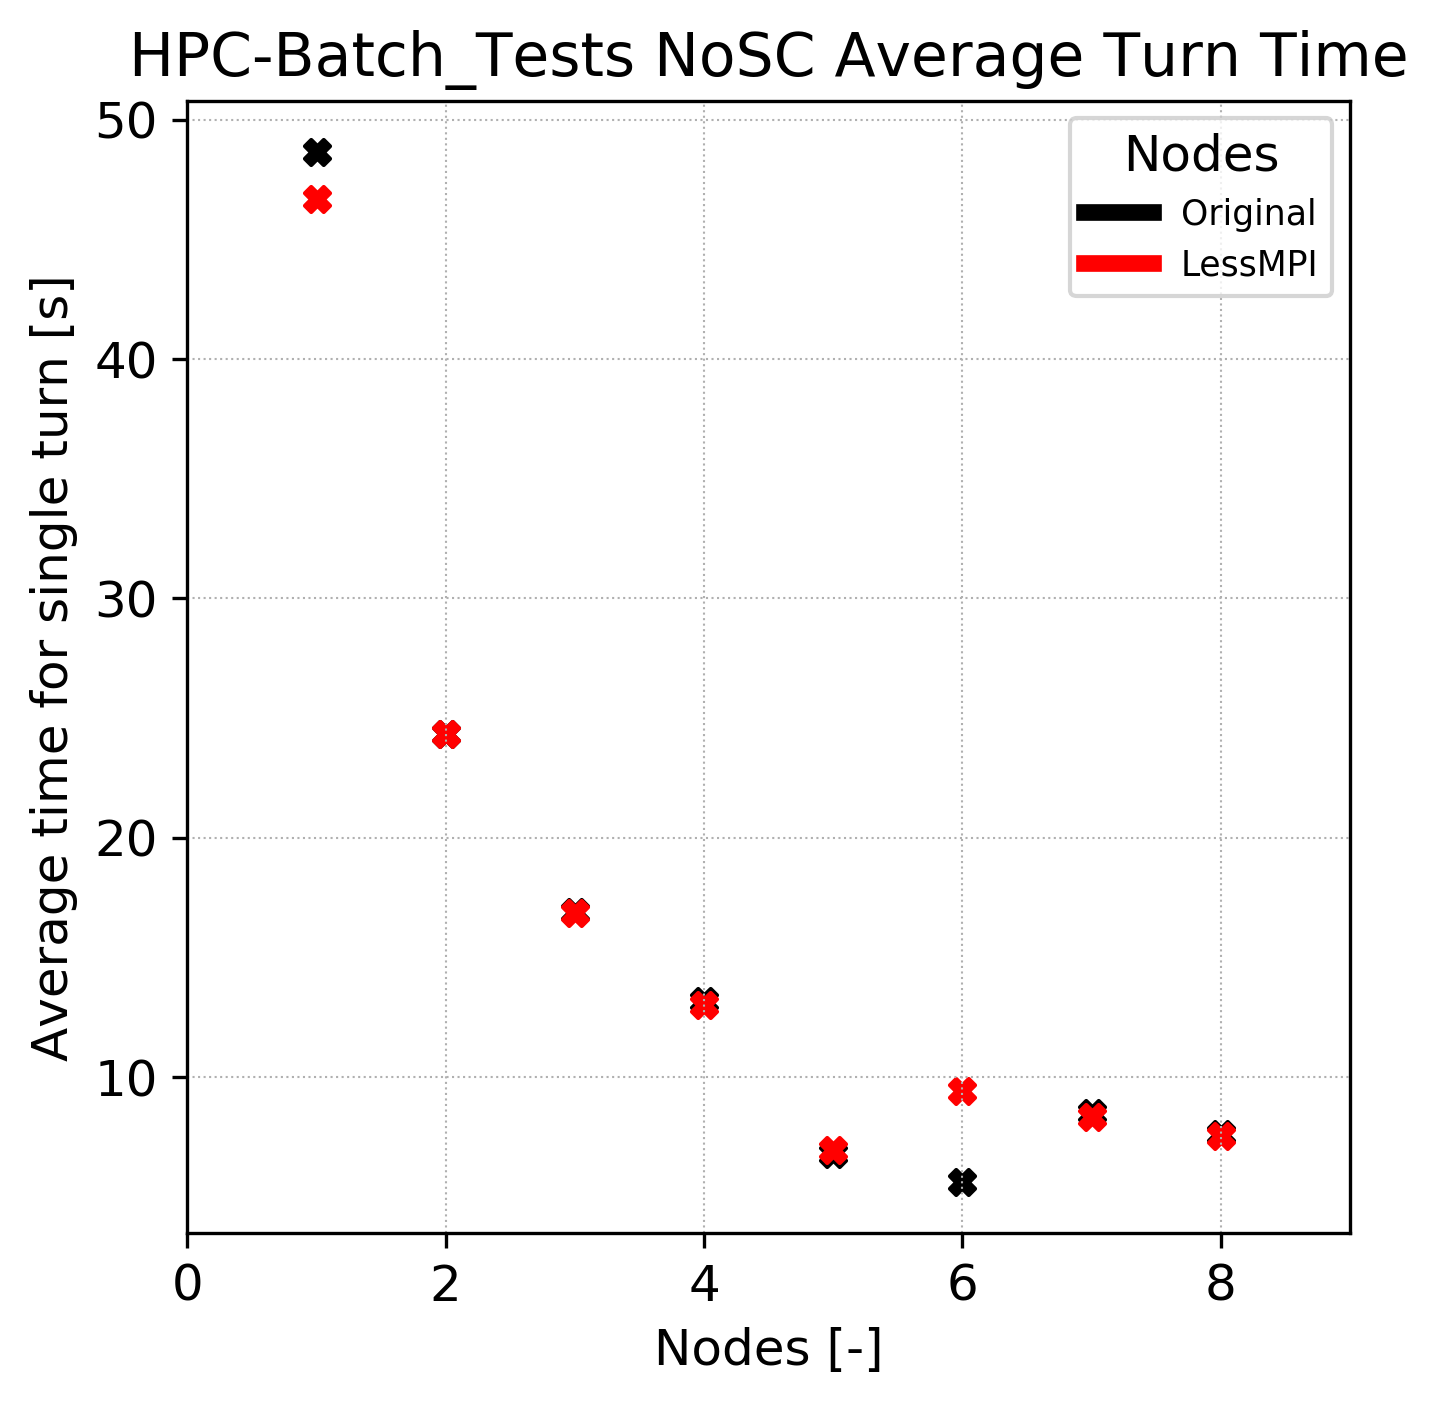

In [8]:
parameter = 'turn_duration'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Average Turn Time'
ax1.set_title(tit);

ax1.set_ylabel('Average time for single turn [s]');
ax1.set_xlabel('Nodes [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

nodes_O = []
nodes_N = []
av_turn_time_O = []
av_turn_time_N = []

for key, value in sorted(dd1.iteritems()):    
    if 'O' in key:
        ls = ':'
        av_turn_time_O.append(np.mean(dd1[key][parameter][0]))
        nodes_O.append(int(key[0]))
    else:
        ls = '-'
        av_turn_time_N.append(np.mean(dd1[key][parameter][0]))
        nodes_N.append(int(key[0]))
    
ax1.scatter(nodes_O, av_turn_time_O, color='k', marker='X');
ax1.scatter(nodes_N, av_turn_time_N, color='r', marker='X');

ax1.set_xlim(0,9);

c_it = c_it + 1;
        
custom_lines = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], color='r', lw=4)]

ax1.legend(custom_lines, ['Original', 'LessMPI'], fontsize='x-small', loc=1, title=legend_label)
ax1.grid(ls=':', lw=0.5)

savename = save_folder + '/' + Case + '_' + parameter + '_average.png'
plt.savefig(savename, dpi = 800);

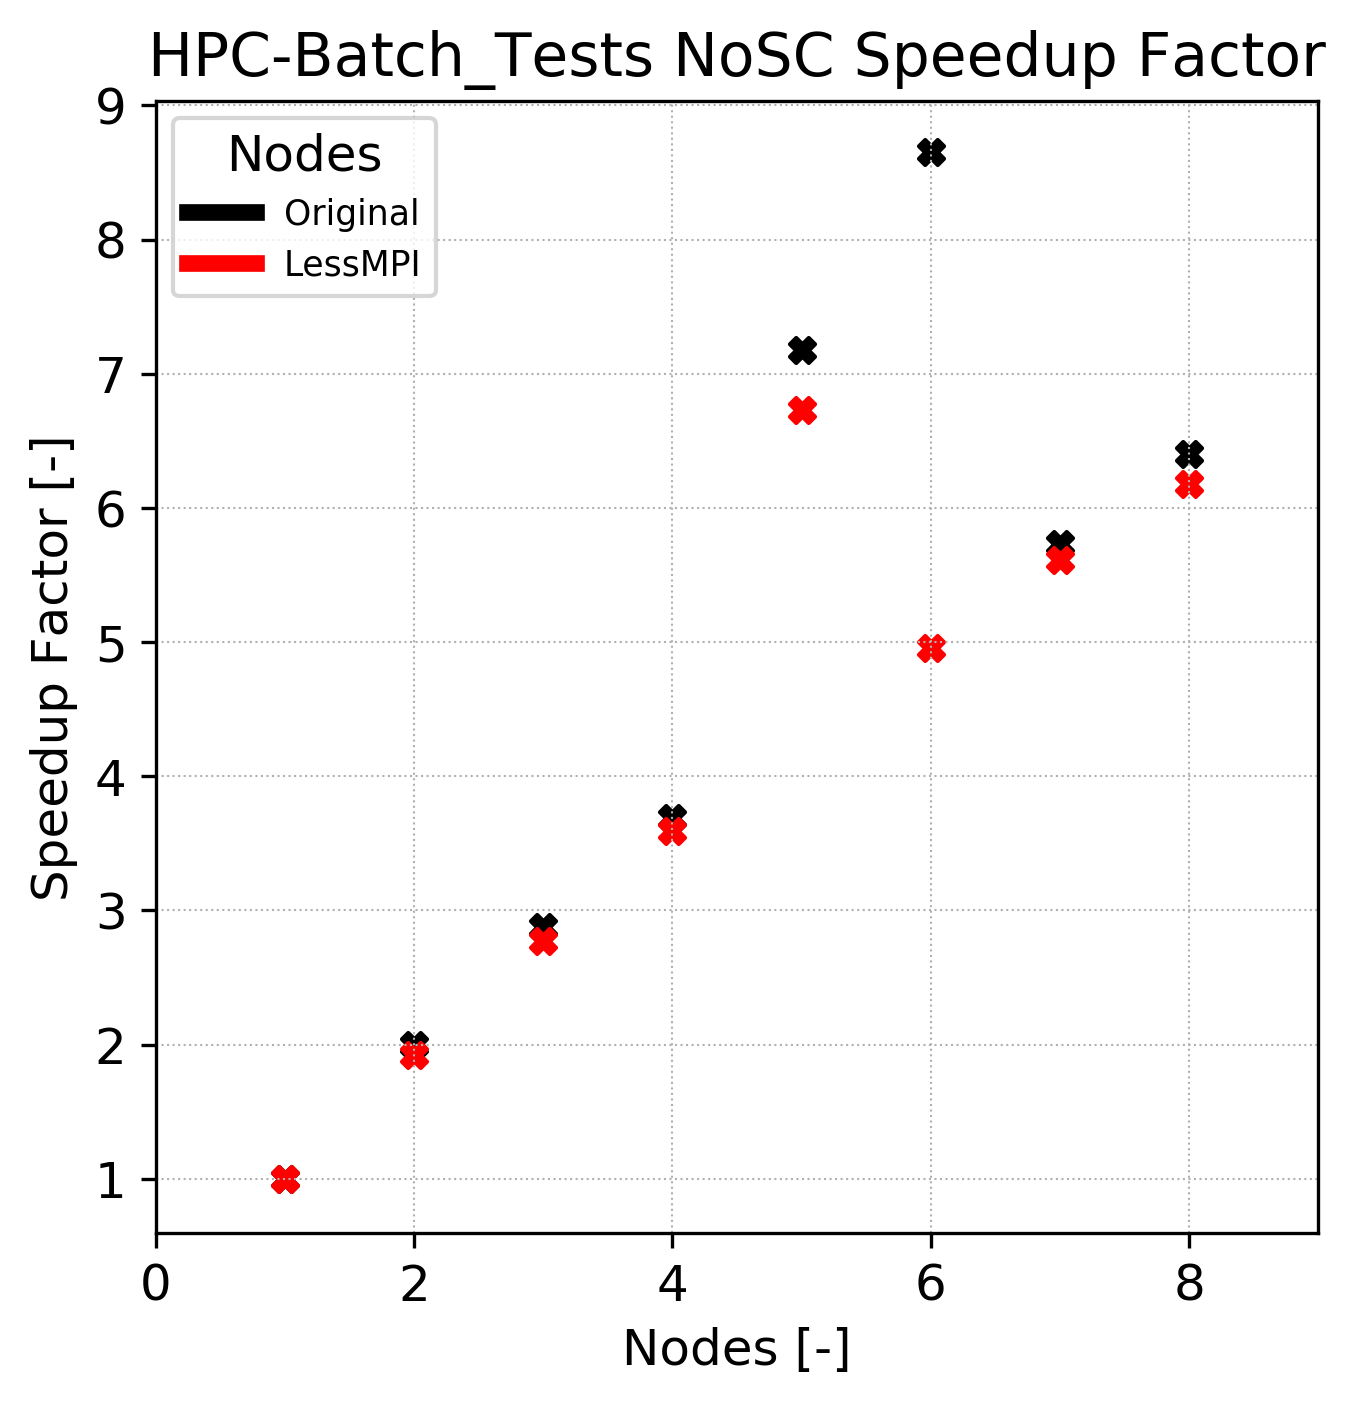

In [9]:
parameter = 'turn_duration'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' Speedup Factor'
ax1.set_title(tit);

ax1.set_ylabel('Speedup Factor [-]');
ax1.set_xlabel('Nodes [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

nodes_O = []
nodes_N = []
av_turn_time_O = []
av_turn_time_N = []

av_1_O = np.mean(dd1['1 O'][parameter][0])
av_1_N = np.mean(dd1['1 N'][parameter][0])
    
for key, value in sorted(dd1.iteritems()):    
    if 'O' in key:
        ls = ':'
        av_turn_time_O.append(1/(np.mean(dd1[key][parameter][0])/av_1_O))
        nodes_O.append(int(key[0]))
    else:
        ls = '-'
        av_turn_time_N.append(1/(np.mean(dd1[key][parameter][0])/av_1_N))
        nodes_N.append(int(key[0]))
    
ax1.scatter(nodes_O, av_turn_time_O, color='k', marker='X');
ax1.scatter(nodes_N, av_turn_time_N, color='r', marker='X');

ax1.set_xlim(0,9);

c_it = c_it + 1;
        
custom_lines = [Line2D([0], [0], color='k', lw=4), Line2D([0], [0], color='r', lw=4)]

ax1.legend(custom_lines, ['Original', 'LessMPI'], fontsize='x-small', loc=2, title=legend_label)
ax1.grid(ls=':', lw=0.5)

savename = save_folder + '/' + Case + '_' + parameter + '_speedup.png'
plt.savefig(savename, dpi = 800);

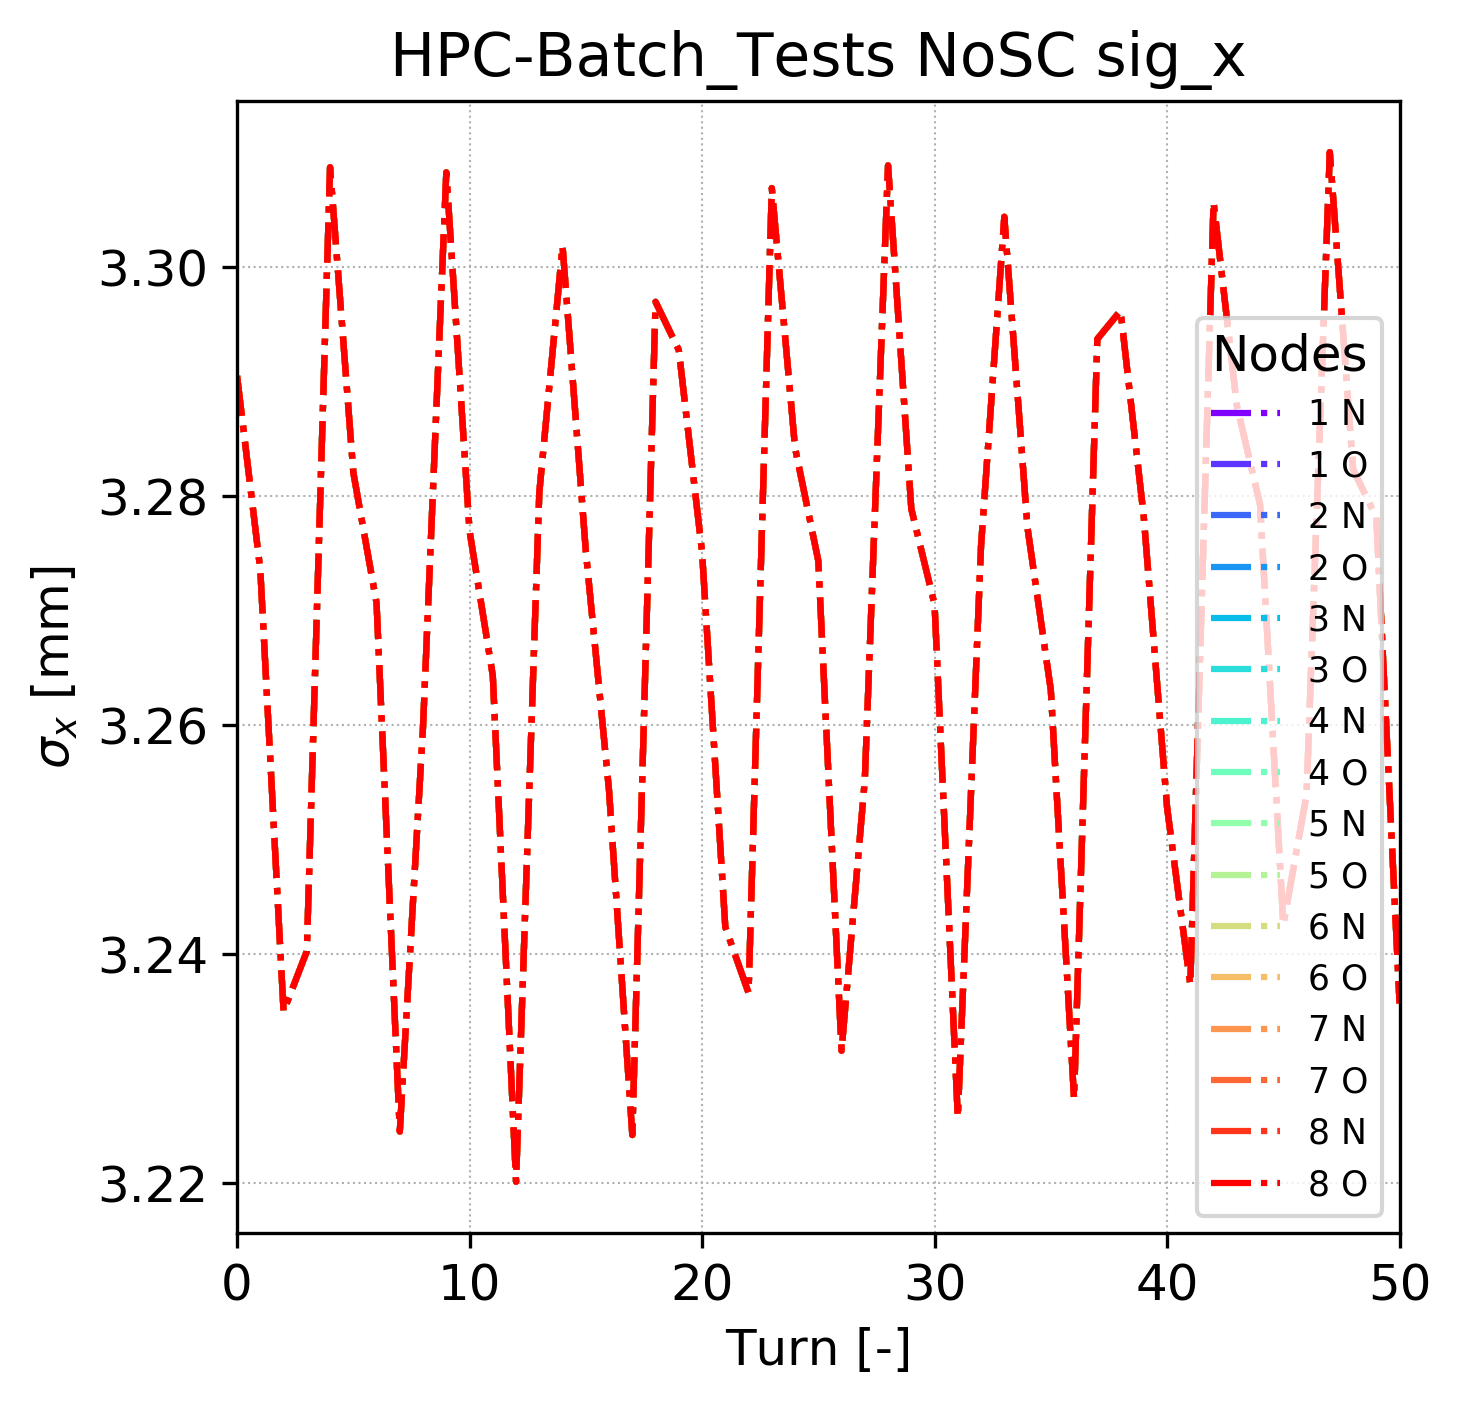

In [10]:
parameter = 'sig_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0]+1, dd1[key][parameter][0]*1000, label=key, color=colors[c_it], ls='-.');
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

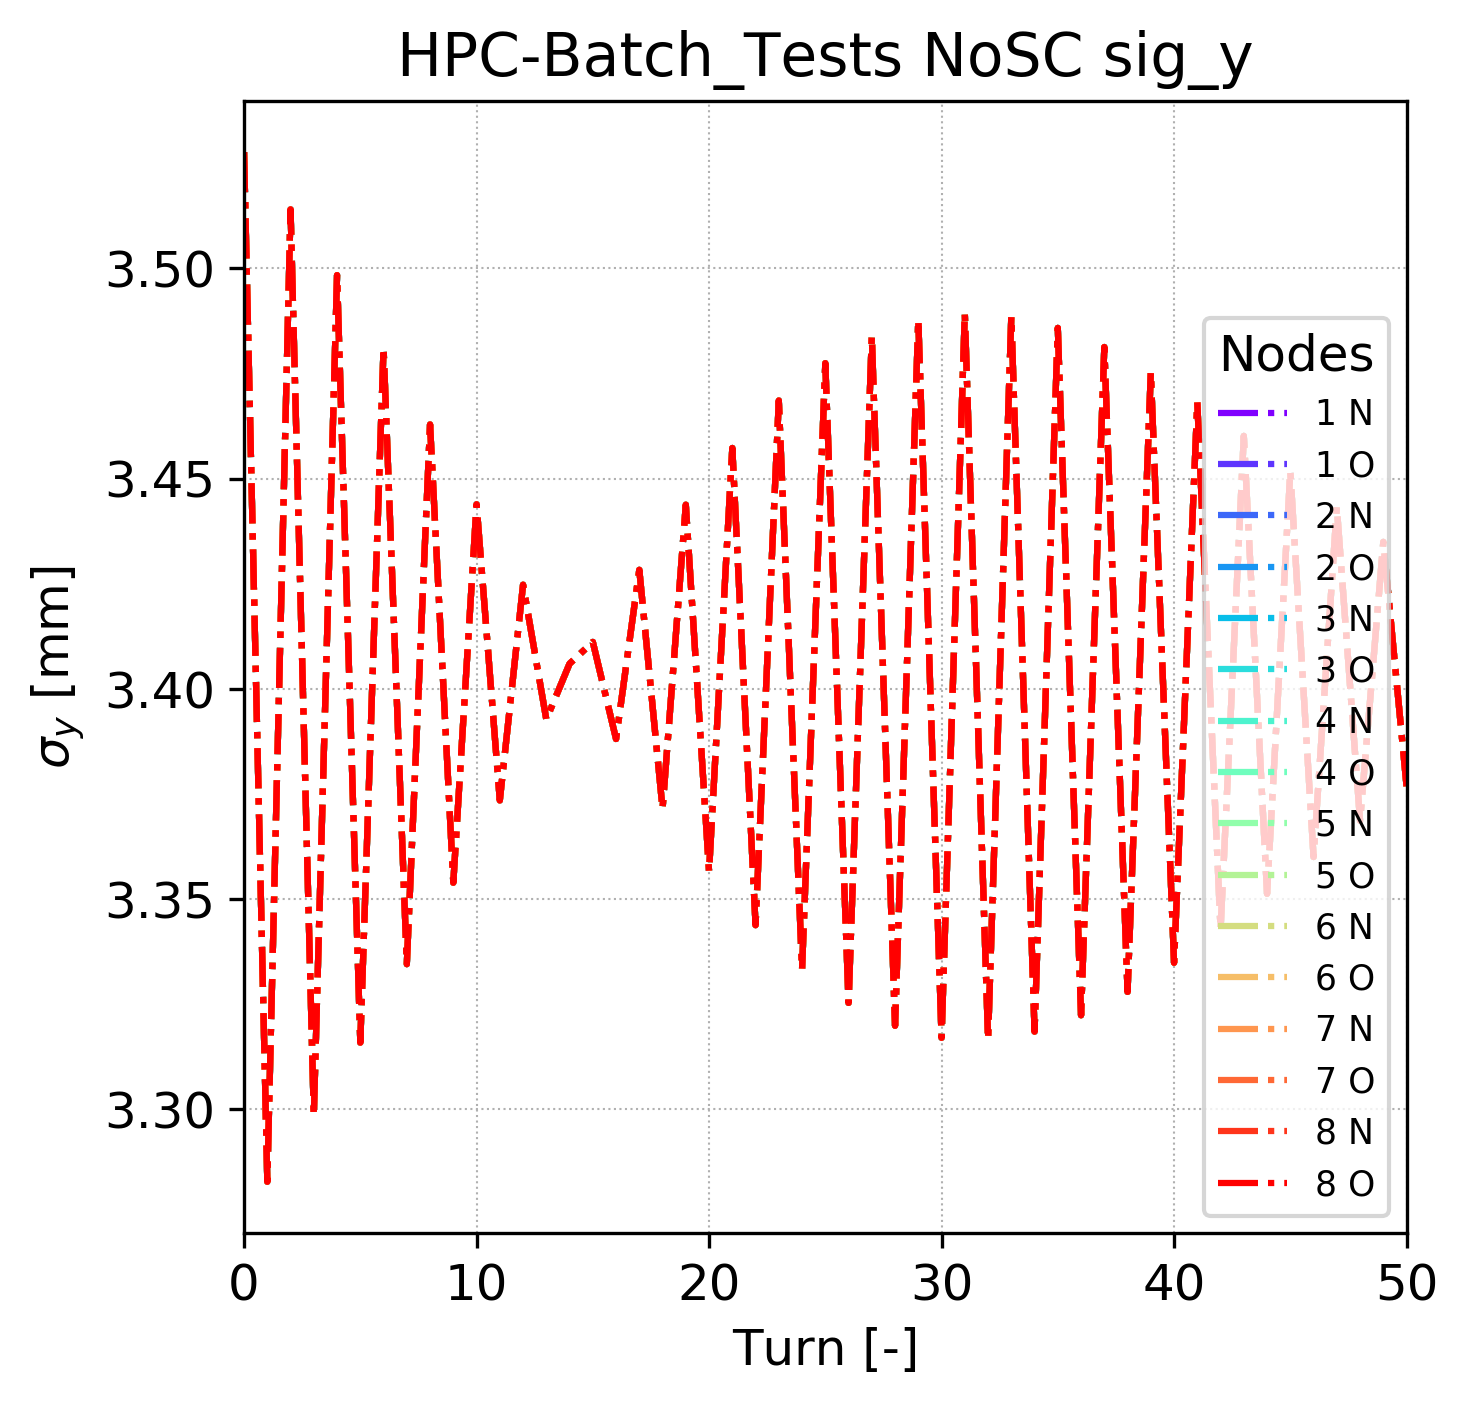

In [11]:
parameter = 'sig_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0]+1, dd1[key][parameter][0]*1000, label=key, color=colors[c_it], ls='-.');
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

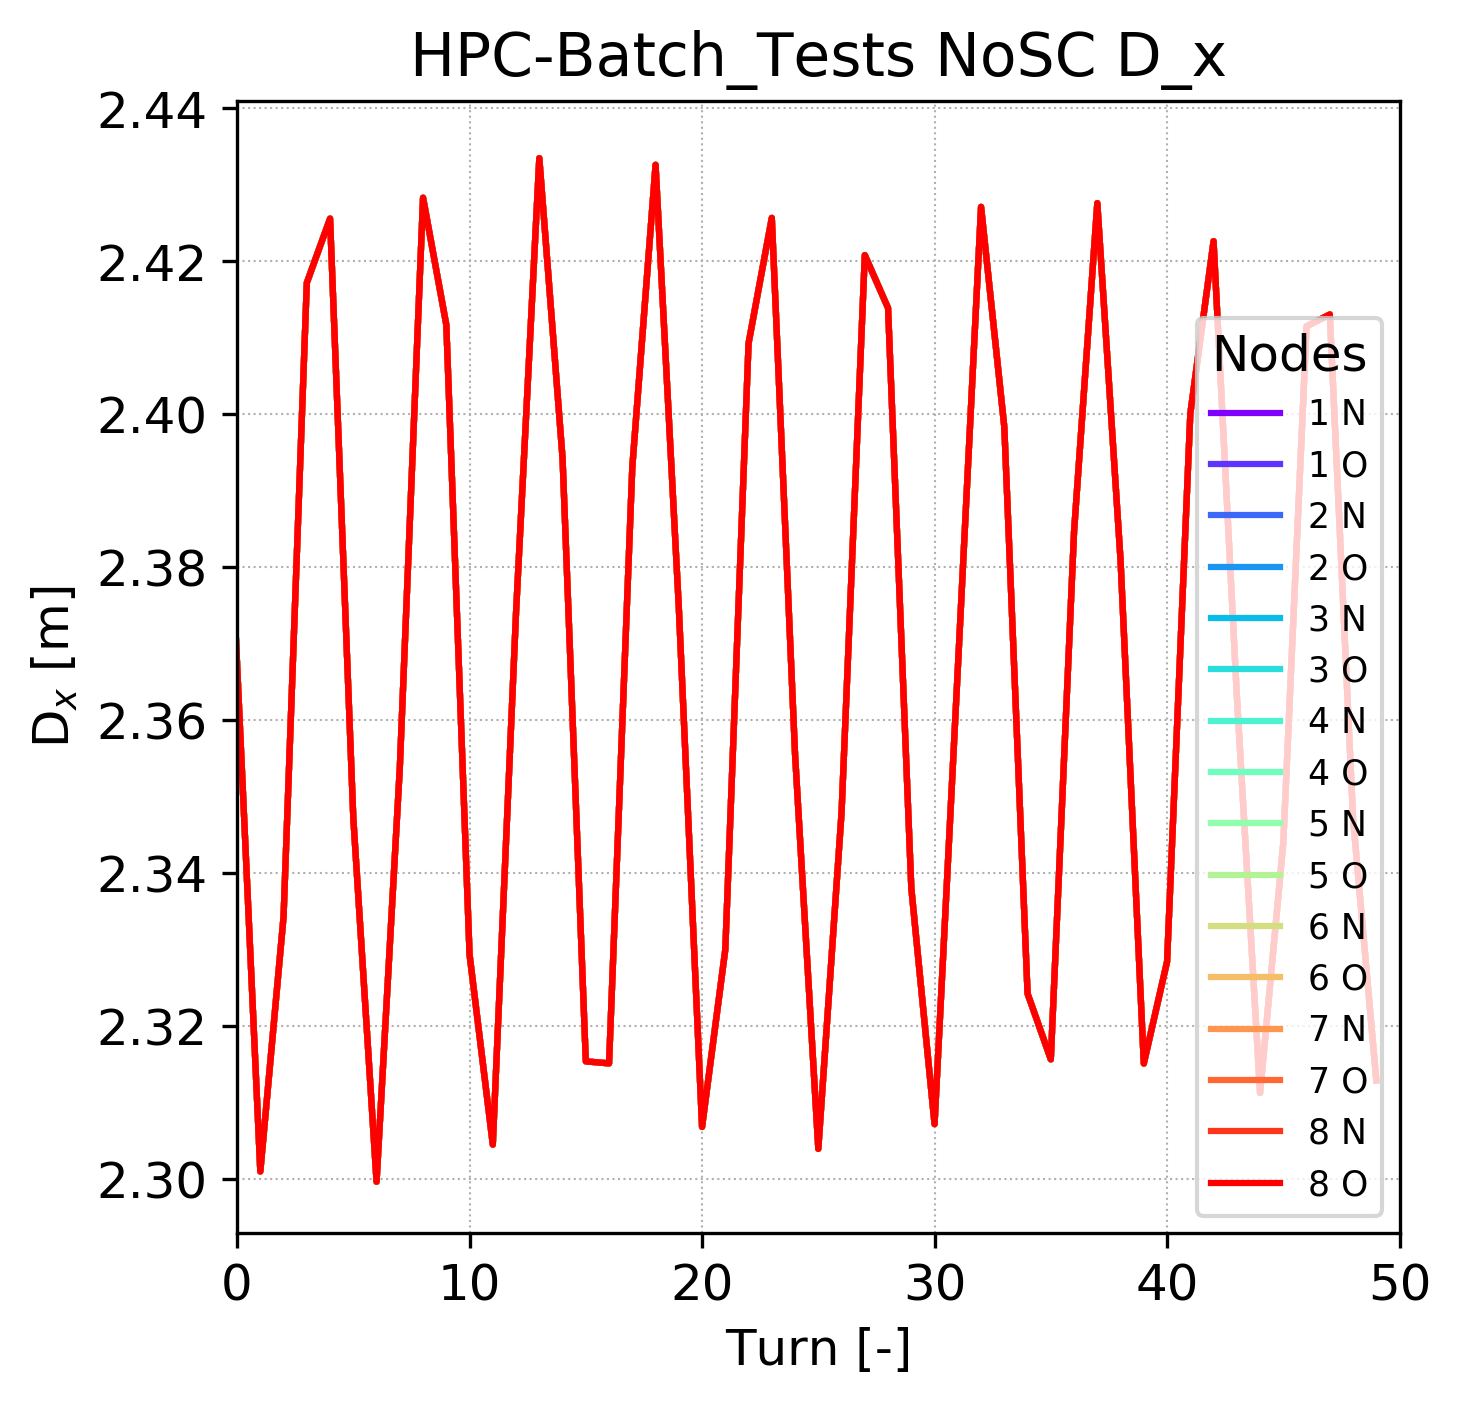

In [12]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

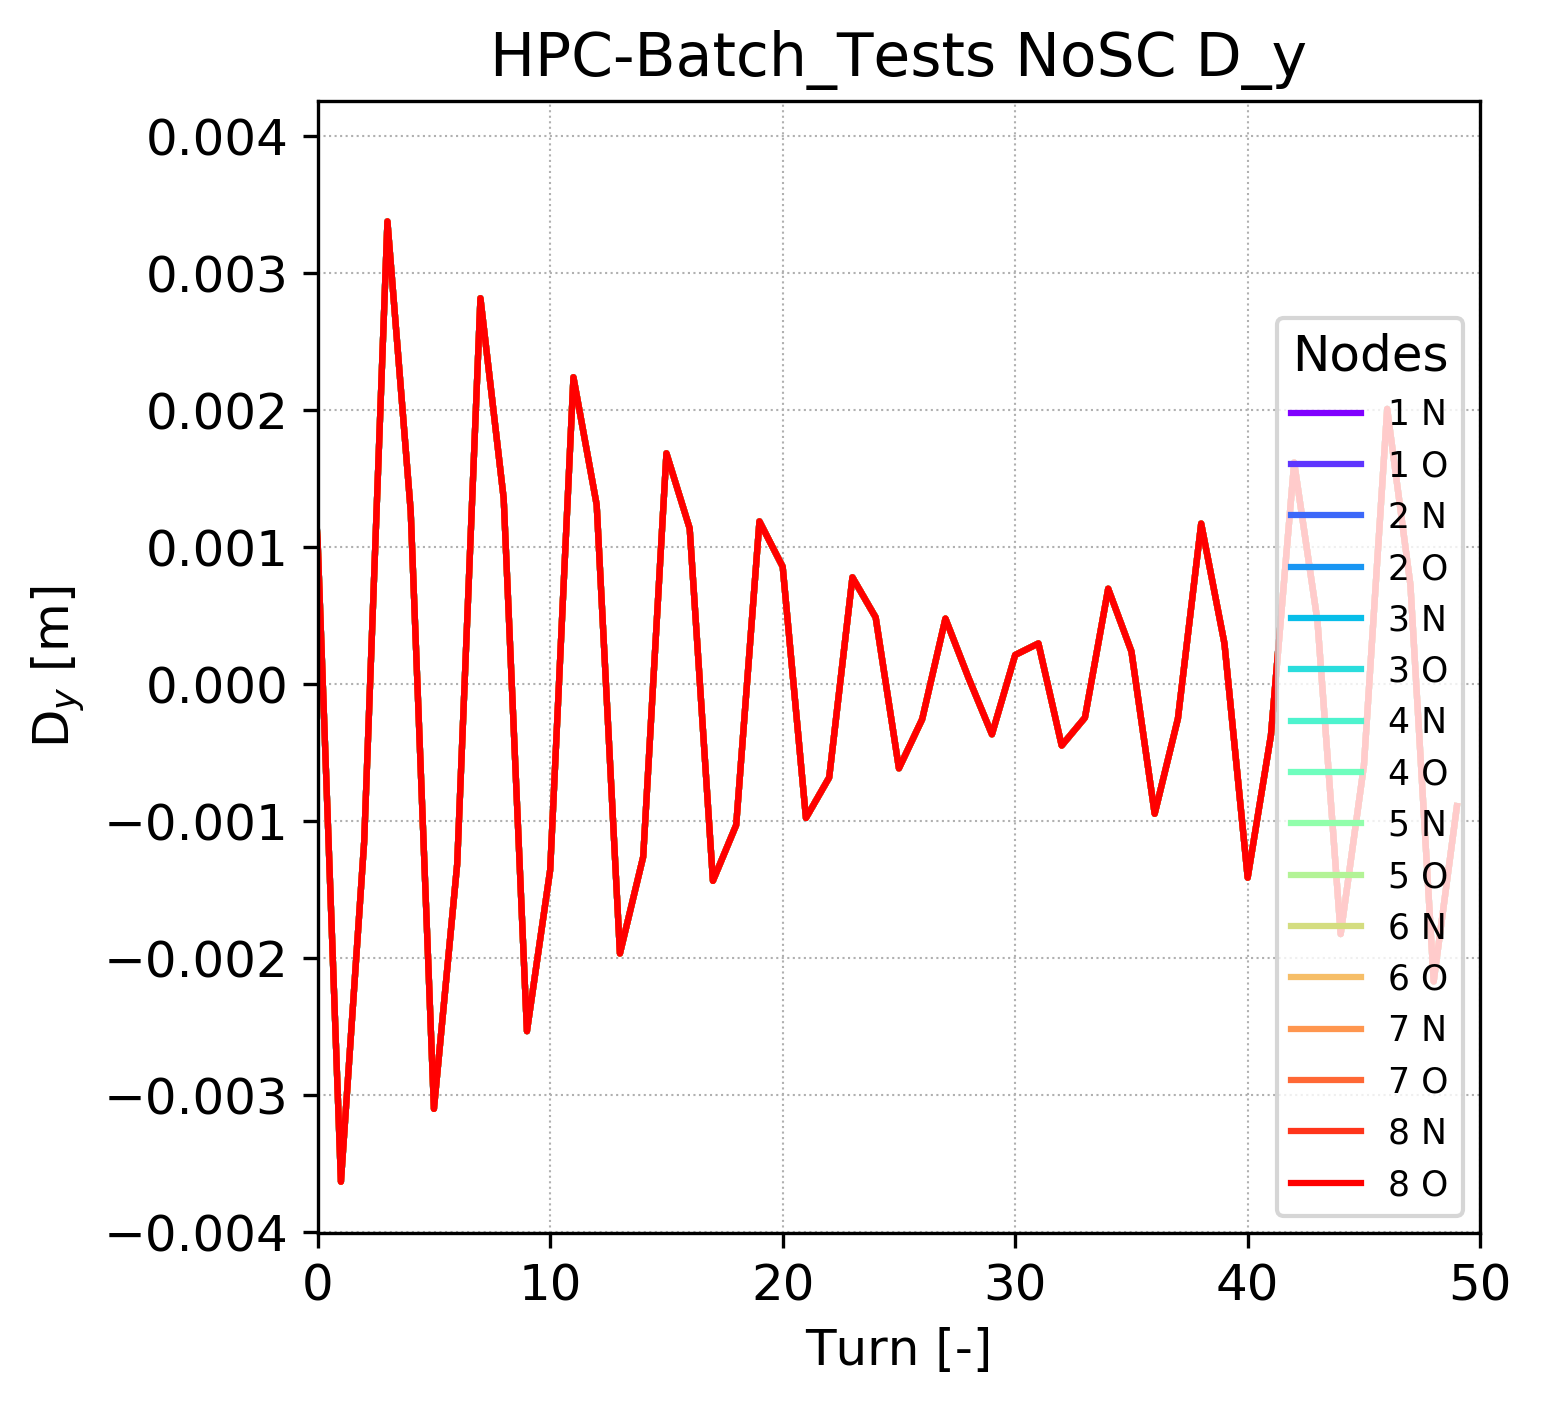

In [13]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

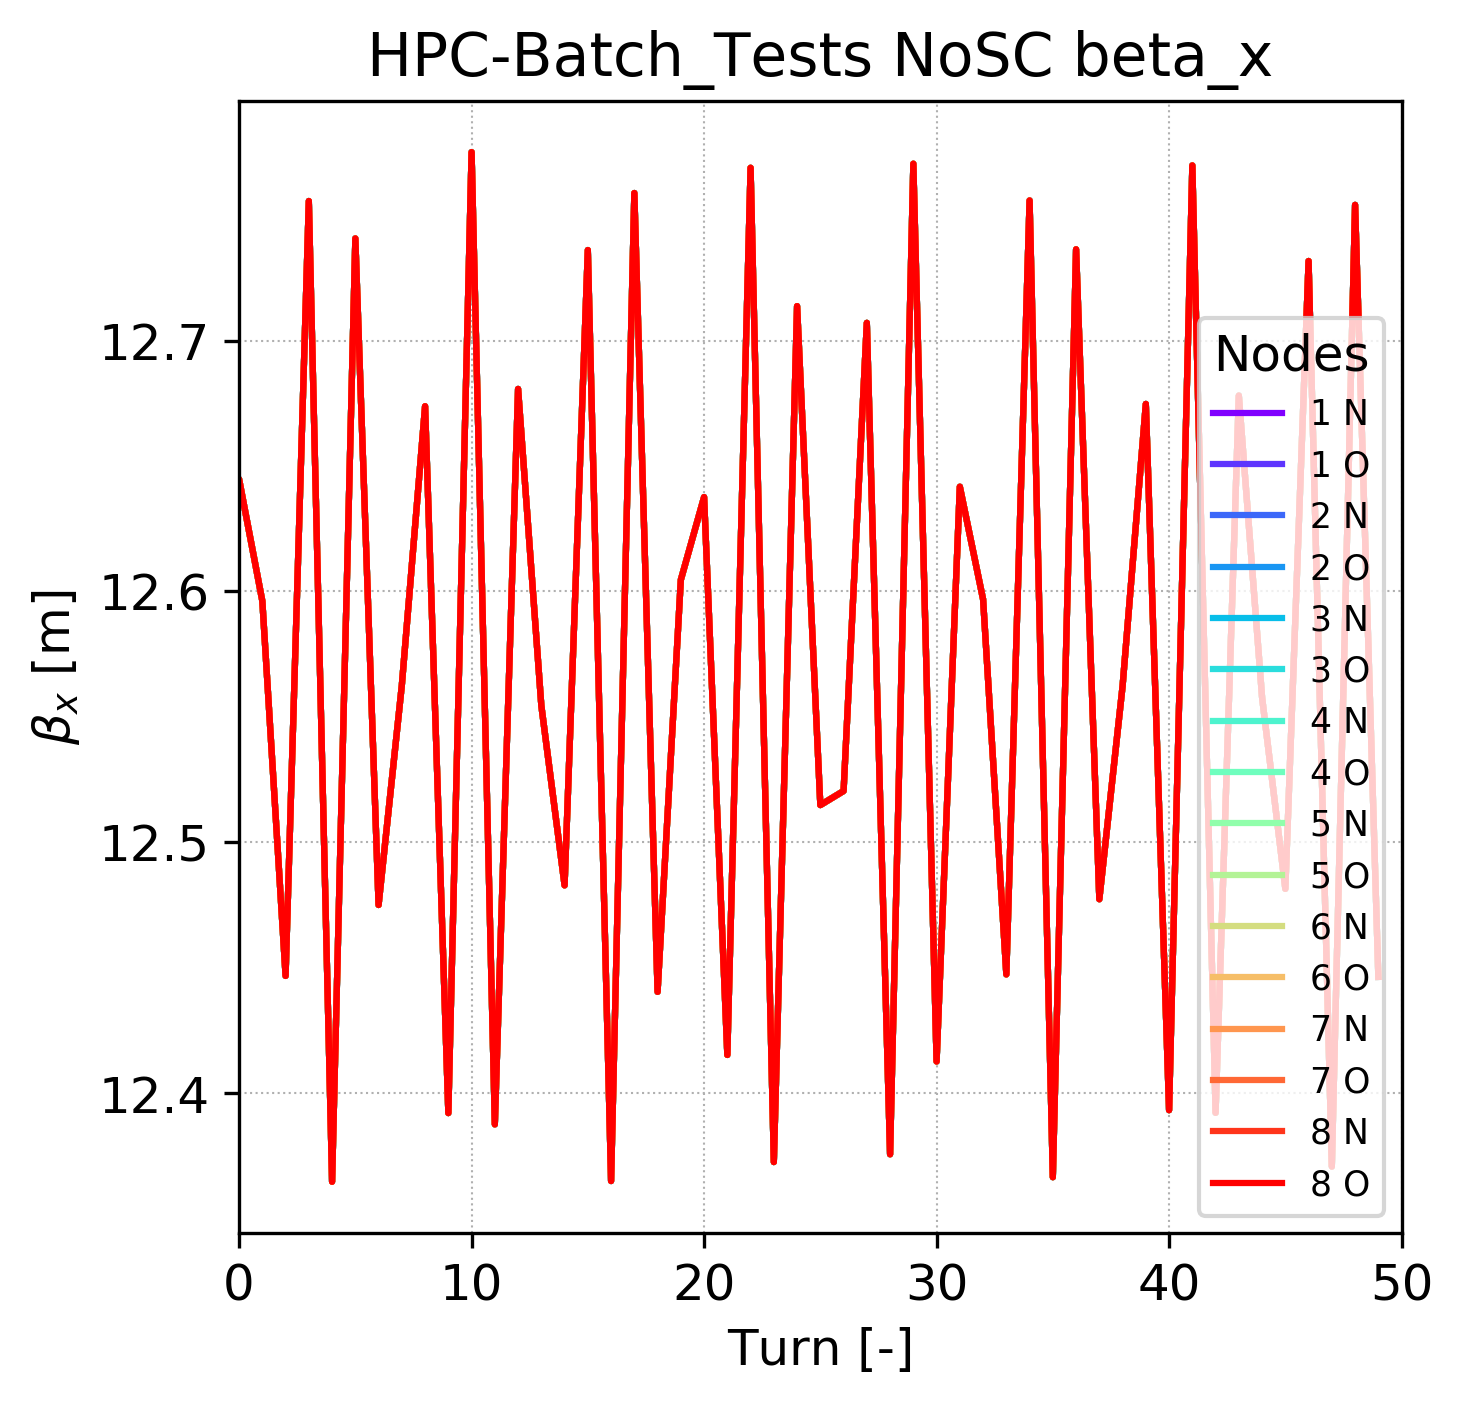

In [14]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
                
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

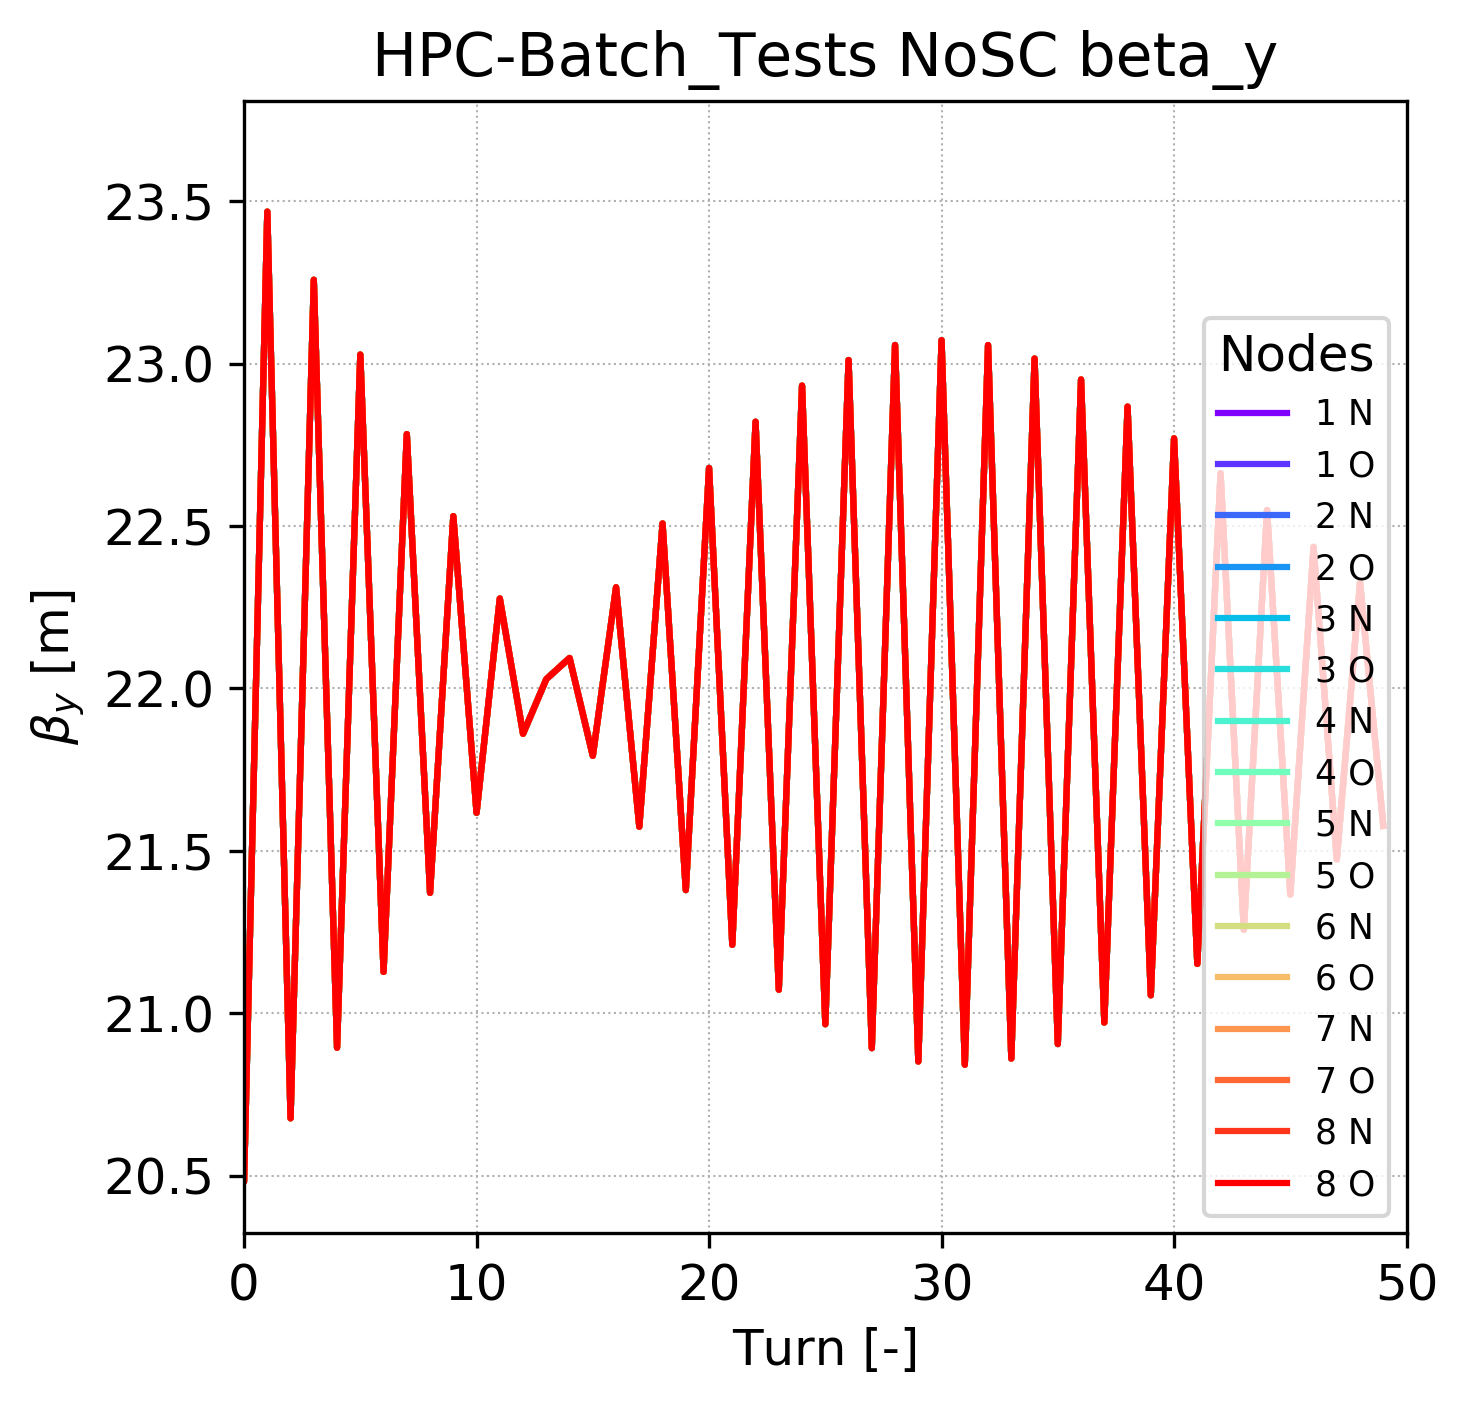

In [15]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
                
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

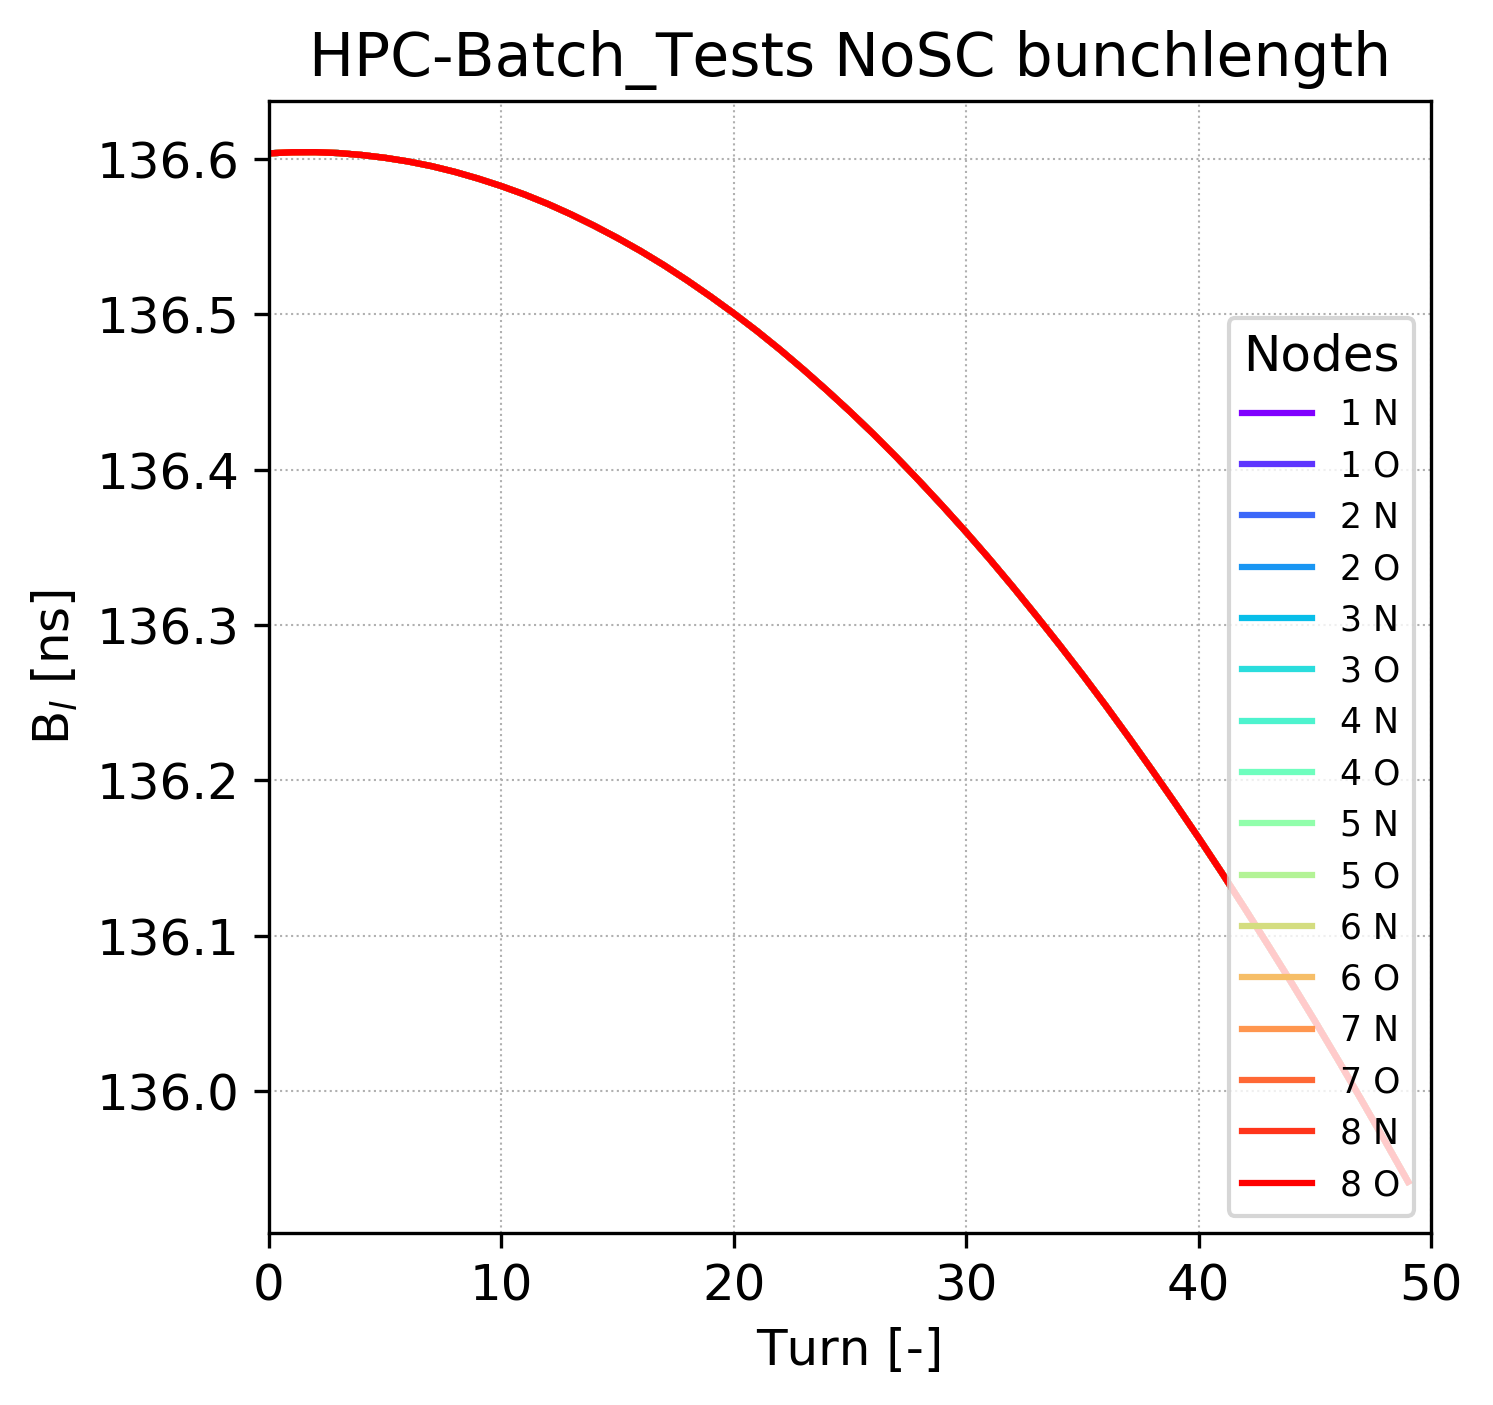

In [16]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E9, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

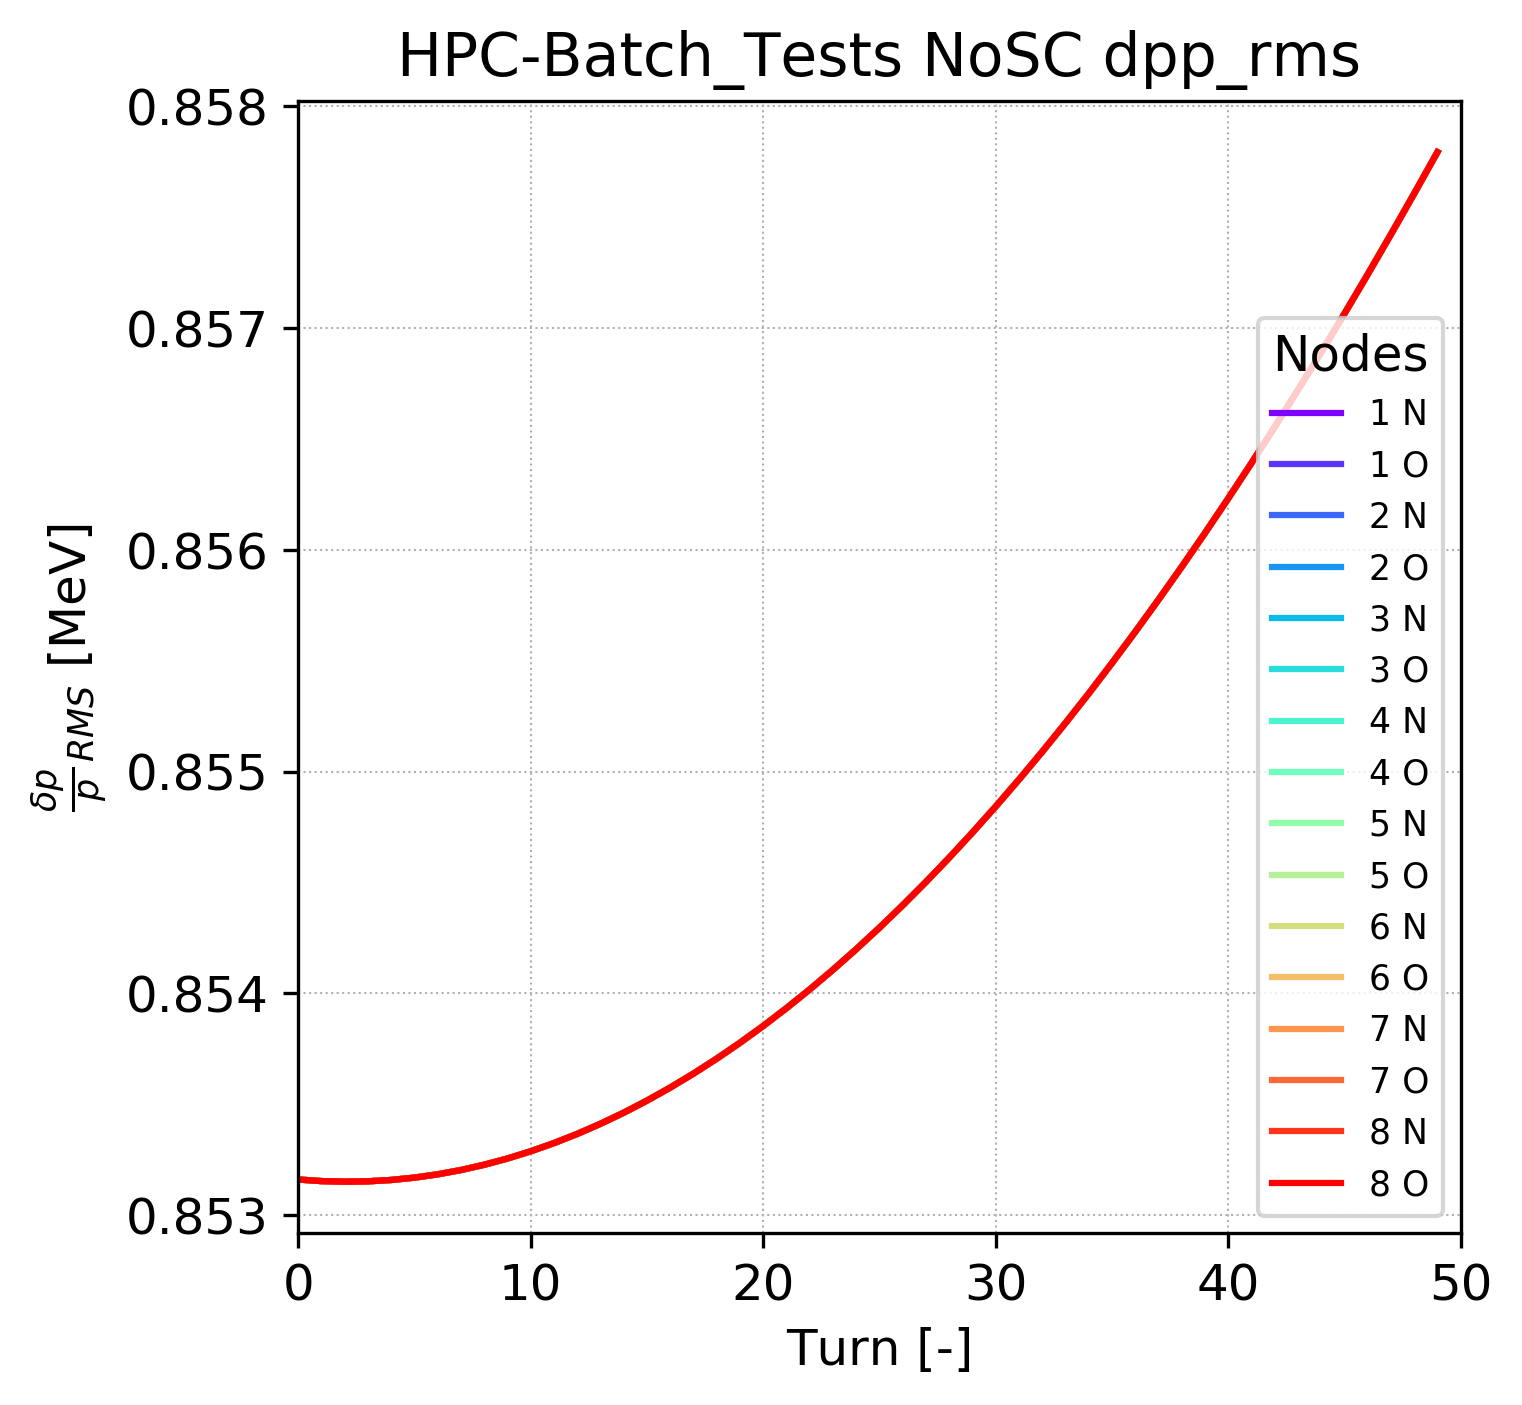

In [17]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

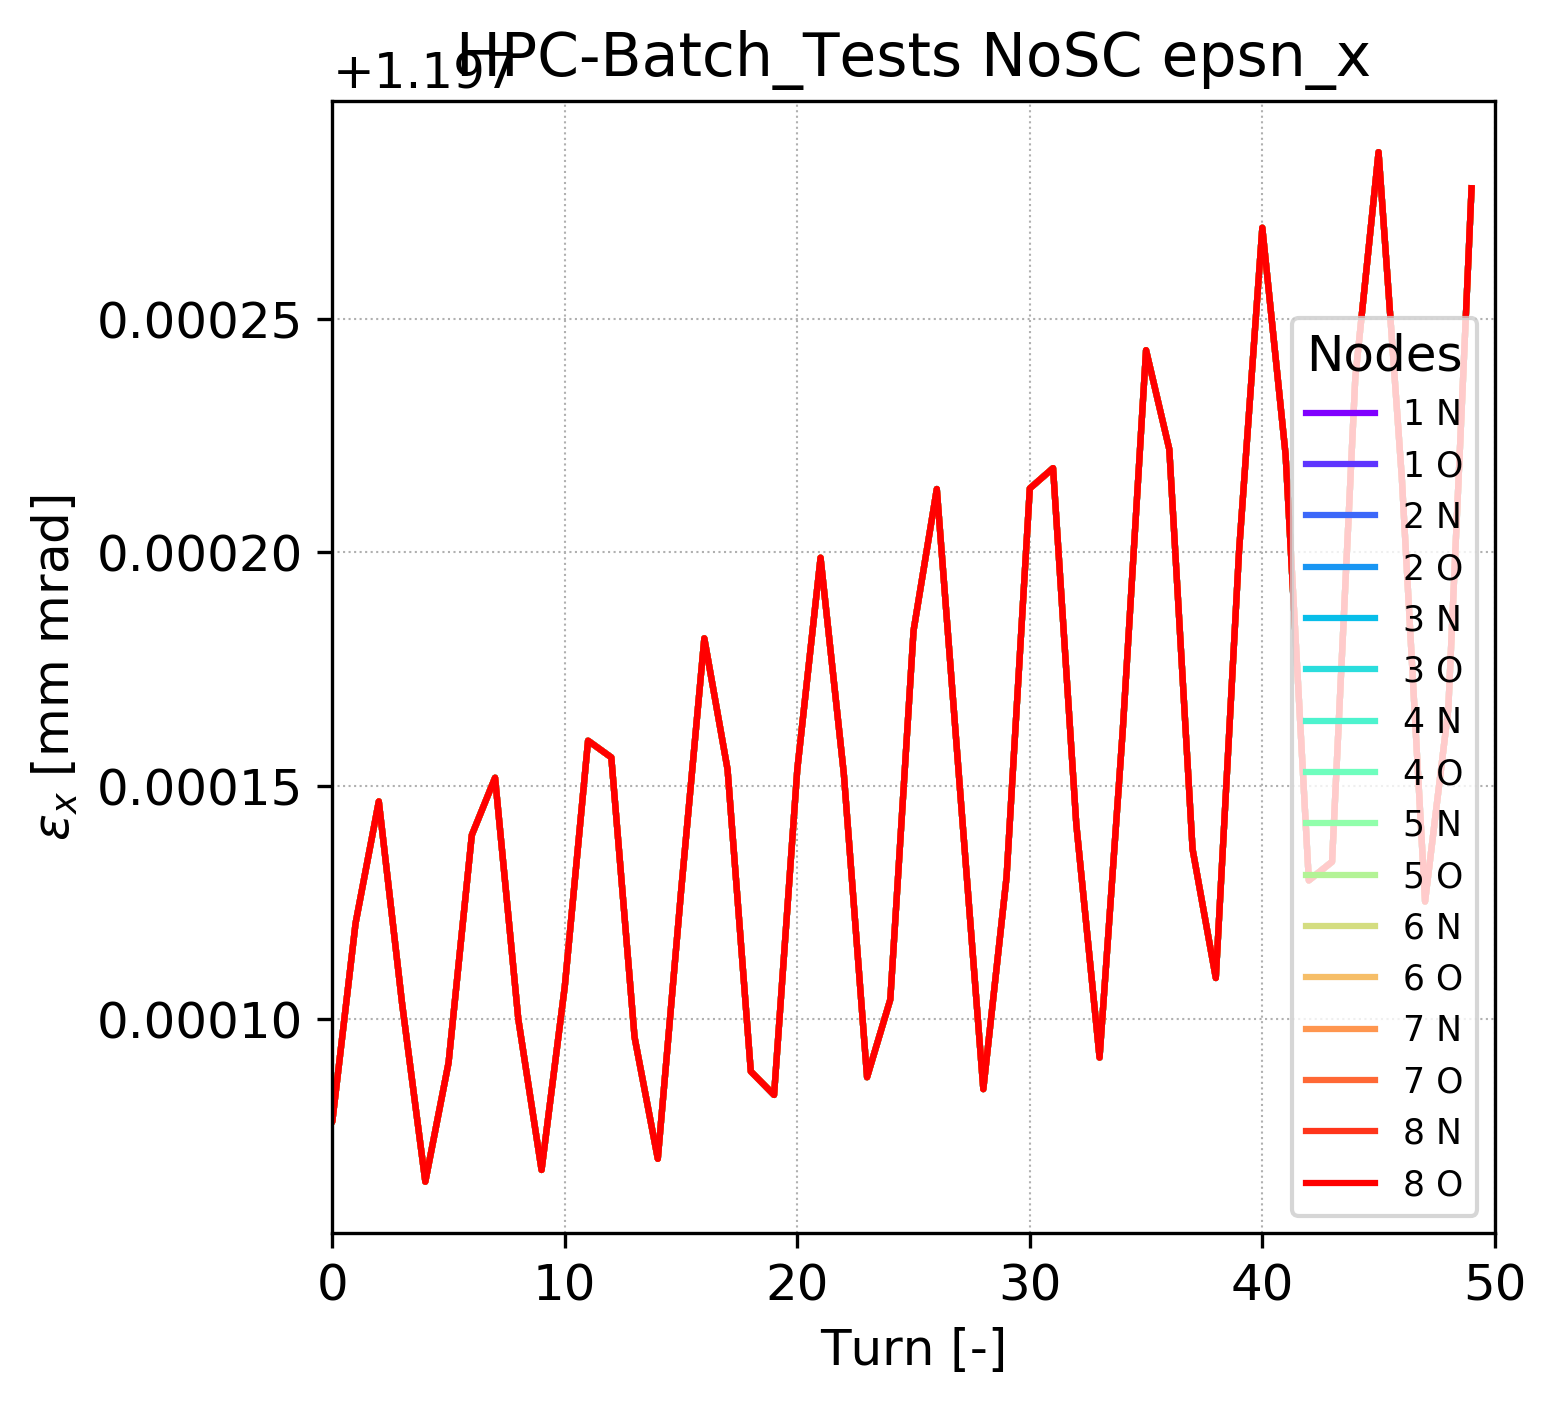

In [18]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

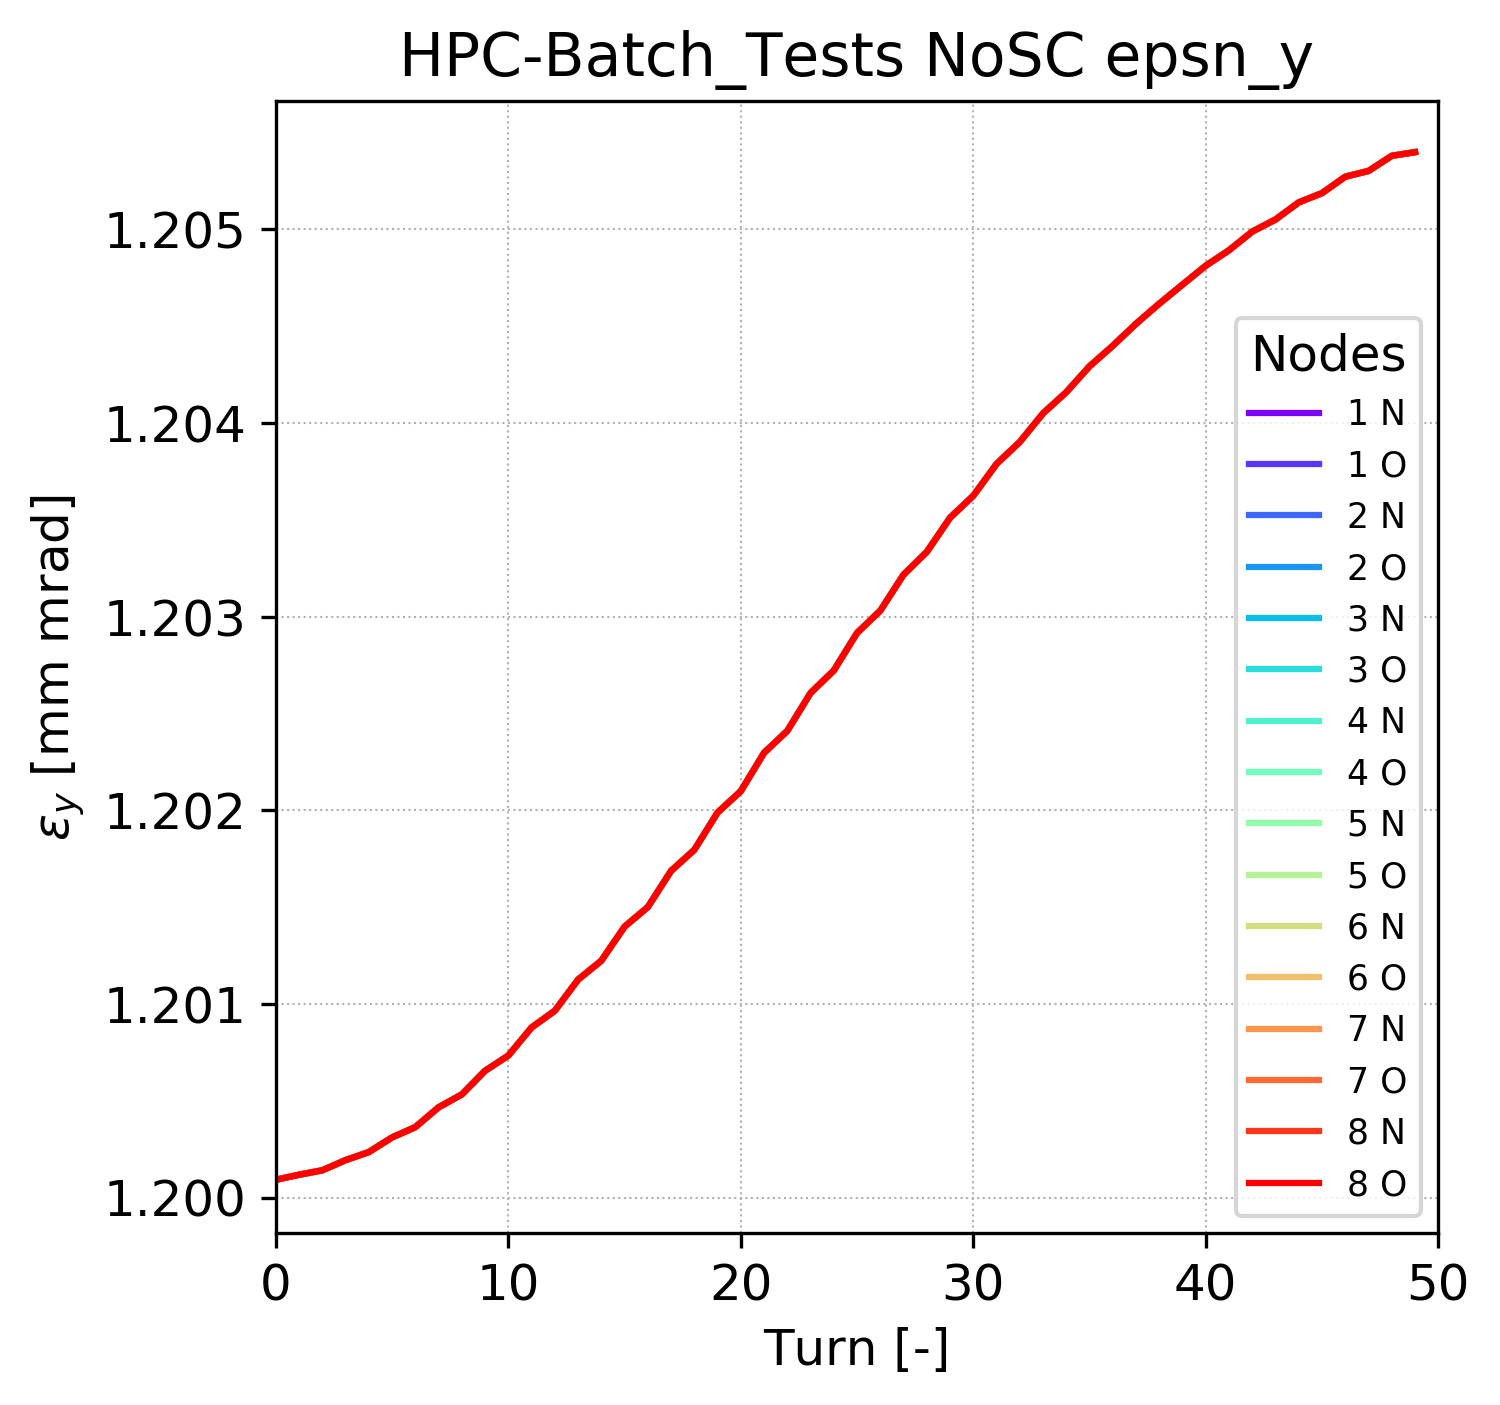

In [19]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid(ls=':', lw=0.5)
ax1.set_xlim(0,turn_tot);

savename = save_folder + '/' + Case + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);